
# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this report**:we are going to investigate and anlysis the dataset of 110527 medical appointments and its 14 associated variables.The main objective of this analsis is to clear the reason of the No.show up of tha midical appiontment in Brazil.In order to do so, we have some questions we are building this analsis on it:
### The questions are  :
#### Does the gender has an affect on show or no-show ?
#### Does the age of patients affect on show or no-show ?
#### Does the scholarship enrollment affect on show or no-show?  
#### Do the patients who have hipertension affect on show or no-show?
#### Do the patients who have diabetics affect on show or no-show?
#### Does the alcoholism affect on show or no-show?
#### Do the handicaps affect on show or no-show?
#### Does the SMS recevied before an appointment has an affect on show or no-show?





In [105]:
# here's several helpful packages to load
import plotly
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from IPython.core.display import display



<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load data, check for cleanliness, and then trim and clean our dataset for analysis. 


### General Properties

In [106]:
# loading my data as csv
df = pd.read_csv('No_show_up_k.csv')

In [107]:
# See the head of data 
df.sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
85250,7.428990e+10,5768375,F,2016-06-03T07:32:37Z,2016-06-03T00:00:00Z,16,CARATOÍRA,1,0,0,0,0,0,No
3128,3.749521e+14,5626200,F,2016-04-27T07:57:52Z,2016-04-29T00:00:00Z,13,SANTO ANTÔNIO,0,0,0,0,0,0,No
45508,4.874336e+11,5642448,M,2016-04-29T15:58:35Z,2016-05-02T00:00:00Z,64,SANTO ANTÔNIO,0,0,0,0,0,1,No


In [108]:
# the dimention of dataset
df.shape

(110527, 14)

In [109]:
# get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [110]:
# Overview on statistical information of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [111]:
# make sure that dataset is clear from missing data 
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [112]:
#make sure dataset does not have a duplicated data 
df.duplicated().sum()

0

In [113]:
# get information about the unique value in each columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Some point about  dataset 
##### 1-Dataset consist from 110527  rows and 14 coulums 
##### 2-No duplicated data.
##### 3-No missing data. 
##### 4-AppointmentID has no unique value .
##### 5- column age has a negative value -1 




## Data Cleaning 
> we notes some problems and notes that may make our analysis hard or not significant, Let's scanning each point lonly and clean our data from this problems.


### 1- Drop unnessery columns

In [114]:
# drop'PatientId','AppointmentID','ScheduledDay','AppointmentDay' columns 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [115]:
# check the modification 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2-  Columns rename and standerdize 
It is important for columns name to be consistant based on snake_case status

In [116]:
# use lambda to remnae all columns names 
df.rename(columns = lambda x: re.sub('([a-z0-9])([A-Z])', r'\1_\2', x).lower(), inplace=True)
# make sure the new names is created 
df.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [117]:
# another one colums name 'no-show' shoud be change to 'no_show'
df.rename(columns={'no-show':'no_show'},inplace=True)

### 3-  Age columns treatment
from samary statistics of data we'ev notsed that age have negative value -1 also shawed that age have outliers.

In [118]:
# specify the index of the negative value
negative_value = df[df['age'] == -1]
# make sure the right selction 
negative_value

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [119]:
# drop the row which contain negative value 
df.drop([99832],axis=0, inplace=True)

In [120]:
# fixing stander diviation by IQR method
for x in ['age']:
    #Calculate the first and third quartile (Q1 and Q3).
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    #Calculate the interquartile range(IQR).
    iqr = q75-q25
    # calculate the min and max bound  
    max = q75+(1.5*iqr)
    min = q25-(1.5*iqr)
    # Replace the data points that lie outside of the minimun and the maximun  bound whith the mean of age column  
    df.loc[df[x] < min,x] = df['age'].mean()
    df.loc[df[x] > max,x] = df['age'].mean()

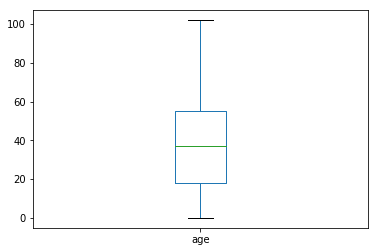

In [121]:
# sure that outliers are removed 
df.age.plot(kind='box')

### 4- Ae subgroup  
 To read data more clear must dscribe the category of the age, 
we will categorize the ages to 5 groups as following
###### 1- toddler:has 0-5years old . 
###### 2-child has 5-12
###### 3-teenager: 12-21 years old.
###### 4-adult has 21-60 years old .
###### 5-elderly: for ages > 60 years old.

***notes that age column has float dtype while ohter numerical variable has int 
so, frist changed it to int46***

In [122]:
# convert datatype of age column to become int64
df['age']= df['age'].astype('int64')


In [123]:
# divied age to five subgroup age ['child', 'kid', 'teen', 'adult', 'alderly']
level = ['toddler', 'child', 'teen', 'adult', 'alderly']

# creat age bins from -1 to avoid the missing data, because the data has zeros value . 
Bins = [-1, 5, 12, 21, 60, 110]

# make new column  call 'age_sub_groub'
df['age_sub_groub']= pd.cut(df['age'], bins=Bins, labels= level)

# But new column go to the last index of datafram , so to make the appearence more clear, we rearange the datafram
# so make age and age_sub_group are close to eath other. 
df=df[['gender', 'age', 'age_sub_groub','neighbourhood', 'scholarship', 'hipertension','diabetes',
       'alcoholism', 'handcap', 'sms_received','no_show']]

In [124]:
# look to the result 
df.sample(10)

,gender,age,age_sub_groub,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
34898,F,76,alderly,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
52630,M,53,adult,JESUS DE NAZARETH,0,0,1,1,0,0,No
75137,F,17,teen,CONQUISTA,0,0,0,0,0,0,No
8250,F,46,adult,SANTA LUÍZA,0,0,0,0,0,0,No
85767,F,35,adult,JARDIM CAMBURI,0,0,0,0,0,1,Yes
91284,F,69,alderly,ANDORINHAS,0,1,0,0,0,0,No
110362,F,22,adult,RESISTÊNCIA,0,0,0,0,0,1,No
84016,M,51,adult,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
48062,F,58,adult,REPÚBLICA,0,0,0,0,0,0,No
109773,M,69,alderly,JARDIM CAMBURI,0,0,0,0,0,0,No


<a id='wrangling'></a>
## Exploratory data analysis 

> In this section of the report, we will expolre data and figur out some information which help us answer on some questions. 
> In this part we will one independent factor like 'gender' and other dependent variable such 'scholarship' and 'hipertension'



### Answer the questions 


**To answer these question I use a def function to help me apply the groupby method for all variable and plot them in the fast way.**


In [125]:
def data_visual(data, variable):
    '''
    data_visual() function doing the follwing:
    
    1- create sub datafrmae by groupby 
    2- plot the figur in the same time 
    
    Args:
    df = the dataset as dataframe.
    variable = string of the variable name.
    
    output:
    groupby sub datarfame 
    
    '''
    # group the data to tow groups based on shaw and no show persentage with all variable 
    df_A = df.groupby(variable)['no_show'].value_counts(normalize=True)
    display(df_A)
    
    # plot the groupby sub dataframe 
    df_A.plot(kind='bar', figsize = (10 ,6))
    plt.title("{} VS Appointment Showing status".format(variable.title()))
    plt.show()
    
    

### Does the gender has an affect on show or no-show ? 

gender  no_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: no_show, dtype: float64

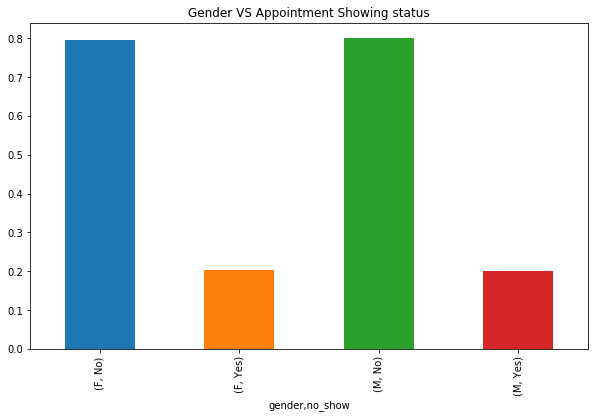

In [126]:
# Showing the percent of male and female .
data_visual(df, 'gender')

### Gender results 
>The resultes coming from gender is not clear and  no sufficient to answer the question 
as we can see hear the gender doesn't make sence in showing or no showing . 
###### so 
###### Does the gender influence the attendance?
**I say that gender has no any effect on the show or no show statment**
 

###  Does the age of patients affect on show or no-show ?

age_sub_groub  no_show
toddler        No         0.813741
               Yes        0.186259
child          No         0.771951
               Yes        0.228049
teen           No         0.743640
               Yes        0.256360
adult          No         0.793541
               Yes        0.206459
alderly        No         0.848003
               Yes        0.151997
Name: no_show, dtype: float64

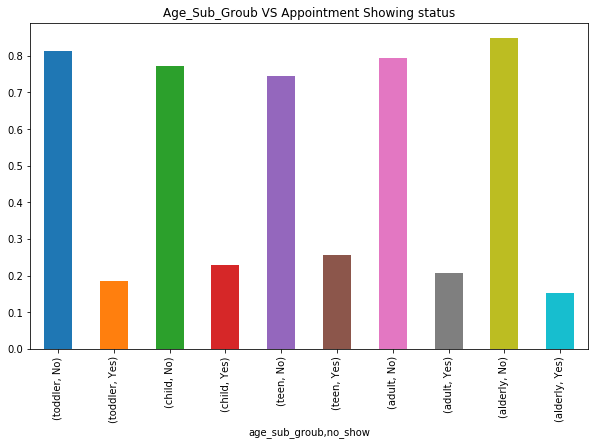

In [127]:
data_visual(df, 'age_sub_groub')

### Age groups results 
>As we can see in age groups we summariz the follwing;
The alderly class show more than the others with around 25% and for no_show the teen is the first with 24.9% but still no sufficient to answer the question. 
###### so 
###### Does the Age groups influence the attendance?
**No significant effect on the show or no show statment**

###  Does the scholarship enrollment affect on show or no-show ? 

scholarship  no_show
0            No         0.801926
             Yes        0.198074
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

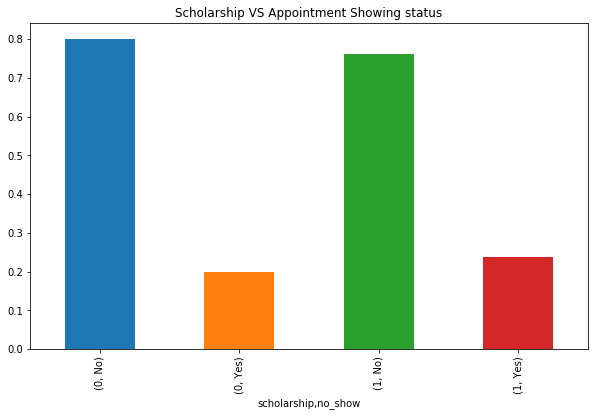

In [128]:
data_visual(df, 'scholarship')

### Scholarship results 
>We can see in scholarship that their are slightily effect for attendence and absence the appointment.  
>>while the most of no-showing patients are students enrolled in the scholarship  with 54.5% aganist 45.5%
students unenrolled in the scholarship.  
###### so 
###### Does the Scholarship effect the attendance?
**Scholarship has slightly effect on the show or no show statment**

### Do the patients who have hipertension affect on show or no-show?

hipertension  no_show
0             No         0.790961
              Yes        0.209039
1             No         0.826980
              Yes        0.173020
Name: no_show, dtype: float64

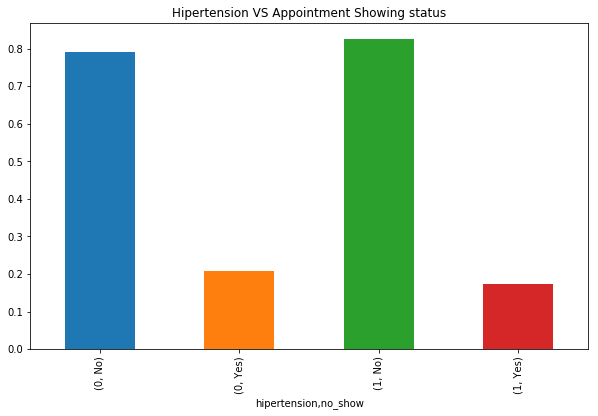

In [129]:
data_visual(df, 'hipertension')

### hipertension results 
>The resultes coming from hipertension is not clear and  no sufficient information to answer the question 
>>As we can see hear the hipertension doesn't make sence in showing or no showing or our analysis has missing something. 
###### so 
###### Does the hipertension influence the attendance?
**I say that hipertension has no any effect on the show or no show statment. **

### Do the patients who have diabetics affect on show or no-show ?

diabetes  no_show
0         No         0.796370
          Yes        0.203630
1         No         0.819967
          Yes        0.180033
Name: no_show, dtype: float64

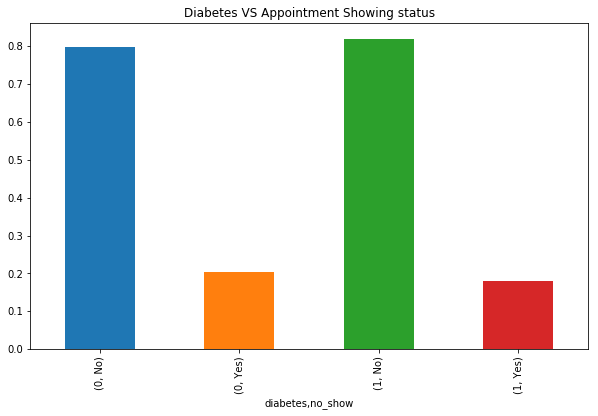

In [130]:
data_visual(df, 'diabetes')

### diabetes results 
>The resultes coming from diabetes is not clear and  no sufficient information to answer the question 
>>As we can see hear the diabetes doesn't make sence in showing or no showing or our analysis has missing something. 
###### so 
###### Does the diabetes influence the attendance?
**I say that diabetes has no any effect on the show or no show statment.**

### Does the alcoholism affect on show or no-show?

alcoholism  no_show
0           No         0.798052
            Yes        0.201948
1           No         0.798512
            Yes        0.201488
Name: no_show, dtype: float64

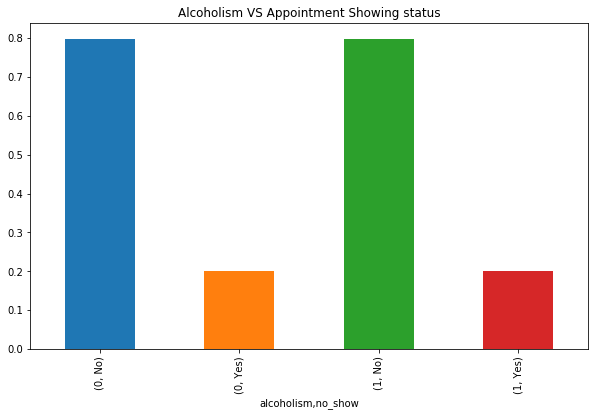

In [131]:
data_visual(df, 'alcoholism')

### alcoholism results  
>The alcoholism has no effect on showing or no showing the appointment.
###### so 
###### Does the alcoholism influence the attendance?
**I say that alcoholism has no any effect on the show or no show statment.**

### Do the handicaps affect on show or no-show?

handcap  no_show
0        No         0.797645
         Yes        0.202355
1        No         0.820764
         Yes        0.179236
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: no_show, dtype: float64

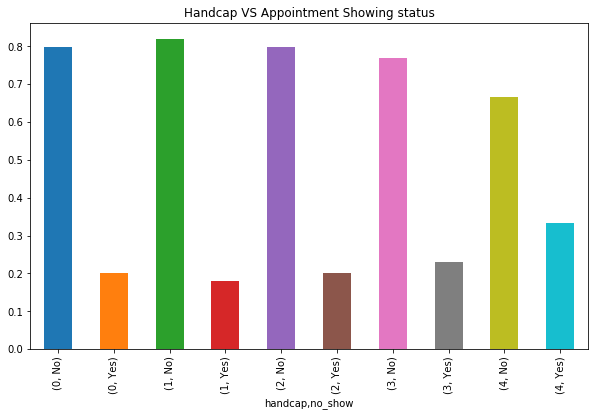

In [132]:
data_visual(df, 'handcap')

### handicap results  
>The handicap has no effect on showing or no showing the appointment.
###### so 
###### Does the handicap influence the attendance?
**I say that handicap has no any effect on the show or no show statment. **

### Does the SMS recevied before an appointment has an affect on show or no-show?

sms_received  no_show
0             No         0.832965
              Yes        0.167035
1             No         0.724255
              Yes        0.275745
Name: no_show, dtype: float64

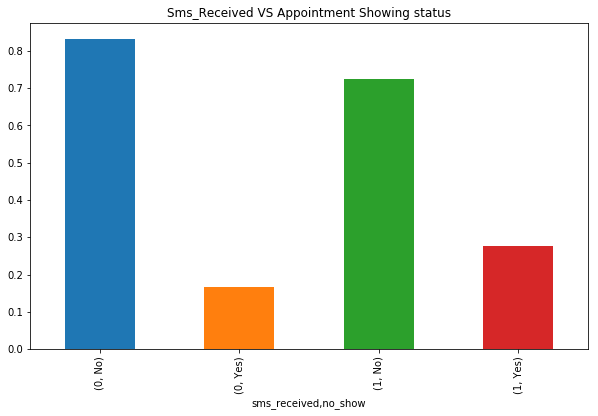

In [133]:
data_visual(df, 'sms_received')

### sms_received results  
>The sms_received has no logical effect no showing or no showing the appointment.
>> while 53.5% of patient who show the appointmnet don't receive SMS will 46.5 didn't receive . 
>> And 62.3% of patient who dont show the appointment receice SMS and 37.7% didn't receive .  
###### so 
###### Does the sms_received influence the attendance?
**However sms_received has opposite effect but we can say that receving a masssge befor the appointment can affect the show or no show statment. **

<a id='conclusions'></a>
## Conclusions

>Generally all of the variables does't make or slight sense to effect on showing or on_showing the midical appointment 
###### But some notese we shoud refear to :
#### 1- Scholarship has slightly effect on the show or no show statment
#### 2- SMS_received has a strange effect no showing and no showing the appointment.
#### 3-Their is a problem maybe in the analysis or maybe in the data itself.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [134]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [135]:
# Refernces
 #### 1- Askpyhton : https://www.askpython.com/python/examples/detection-removal-outliers-in-python
####  2-stackoverflow : https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe
#### 3- pandas   : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#reindexing-selection-label-manipulation